# Number of meetings

### At varying sentiment levels

Analysis of statistics of opinions, here: number of meetings. How does this number change when sentiment bounds are varied, and the interaction with $\theta$. $\lambda$ is 0.5 (minimum variance treatment) in all the simulations that were considered here. There are no coherence features, so treatments with different values of $\gamma$ or $\kappa$ refer to independent simulation runs, rather than different parametrisations.

The number of meetings conditioned on sentiment bounds appears in the top left panel of figure 5.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import rc
rc('text', usetex=True)

Make sure that export folder for figures exists. If not, make it.

In [2]:
parent_path = os.path.join(os.getcwd(), "figures")

path = os.path.join(os.getcwd(), "figures\\meetings")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path):
    os.mkdir(path)

In [3]:
sns.set_style('whitegrid')

l = '$\lambda$'
th = '$\\theta$'
g = '$\gamma$'
k = '$\kappa$'

### Data

Import (read) and organise data

In [4]:
# empty 4-dimensional array (one for each parameter)
var = np.full((21,9,9,9), np.nan)

##### Dimensions - Parameters:
* **0: sentiment value** $\rightarrow \texttt{range(0.05, 0.95, 0.05)}$
* **1: theta** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **2: gamma** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **3: kappa** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$

In [5]:
# sentiment values
sents = ['00','05'] + [str(i) for i in range(10, 101, 5)]

# loop through sentiment values, read data and store in appropriate position
for i, sent in enumerate(sents):
    with open(f'M1/K0G0T1-A300T1000M50S{sent}-n8/stats.txt') as f:
        for j, line in enumerate(f):
            var[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[3])
            
# meetings were double-counted (once for each agent involved)
var /= 2


### Analysis of unconditional values

#### Sentiment

Variance at different sentiment levels, averaged over all other parameters

In [6]:
n = len(var[i,:,:,:].flatten())
var_snt_er = np.array([np.std(var[i,:,:,:].flatten()) / np.sqrt(n) for i in range(21)])
var_sent = np.array([var[i,:,:,:].mean() for i in range(21)])

<IPython.core.display.Javascript object>


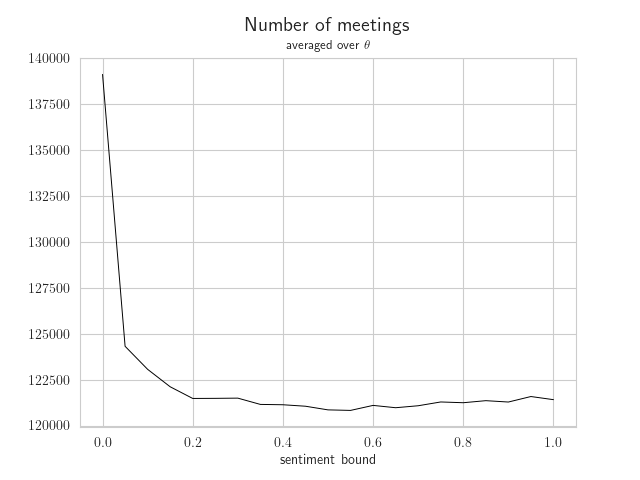

In [7]:
x = [int(sent) / 100 for sent in sents]
plt.figure()
plt.title('\Large{Number of meetings} \n \small{averaged over $\\theta$}')
plt.xlabel('sentiment bound')

props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.23, 262100, '$\lambda=0.5$', bbox=props)
plt.plot(x, var_sent, linewidth=0.7, c='black')

plt.savefig('figures/meetings/sentiment_meetings.png')

<IPython.core.display.Javascript object>


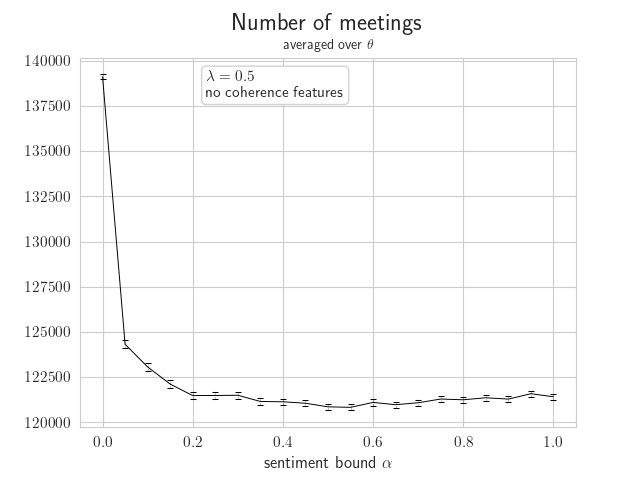

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
x = [int(sent) / 100 for sent in sents]

plt.figure()
plt.title(f'\LARGE{{Number of meetings}} \n \\normalsize{{averaged over {th}}}')
plt.xlabel('sentiment bound $\\alpha$', fontsize=12)

eb = plt.errorbar(x, var_sent, var_snt_er, linewidth=0.7, c='black', elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

ax = plt.gca()
ax.tick_params(axis='both', labelsize=11)

props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.23, 138000, '$\lambda=0.5$ \n no coherence features', bbox=props, fontsize=11)

plt.savefig('figures/meetings/sentiment_meetings_erbars.png')
plt.savefig('figures/meetings/sentiment_meetings_erbars_nocred.eps')

### Analysis of conditional values 

#### Sentiment | $\theta$

Variance of opinions at different sentiment bound levels, for all different values of theta

In [9]:
# colomap for different values of variables that sentiment is conditioned on
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, 9))

In [10]:
var_sent_t = np.array([[var[i,j,:,:].mean() for i in range(21)]for j in range(9)])

<IPython.core.display.Javascript object>


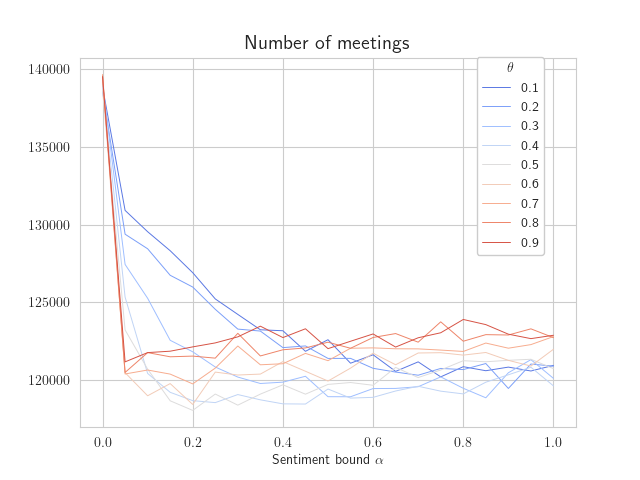

In [11]:
plt.figure()
plt.title('\Large{Number of meetings}')

for i in range(9):
    plt.plot(x, var_sent_t[i], label=(i+1)/10, lw=0.7, c=cmap[i])

plt.xlabel('Sentiment bound $\\alpha$')

plt.legend(title='$\\theta$', bbox_to_anchor=(0.95, 1.02), framealpha=1)
plt.text(1, 254700, '$\lambda=0.5$')

plt.savefig('figures/meetings/sentiment_theta_meetings.png')

### Other parameters conditional on sentiment

#### $\theta$ | Sentiment

Other way around

In [12]:
# colormap for different values of variables that are conditioned on sentiment 
cmap = plt.cm.coolwarm(np.linspace(0, 1, 21))

In [13]:
var_t_sent = np.array([[var[i,j,:,:].mean() for j in range(9)]for i in range(21)])

<IPython.core.display.Javascript object>


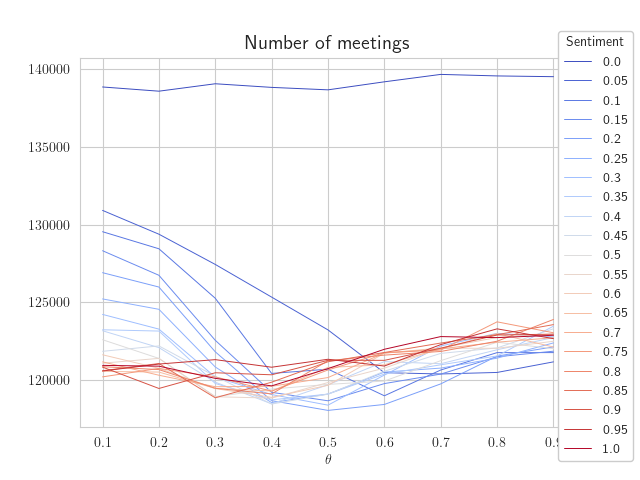

In [14]:
plt.figure()
plt.title('\Large{Number of meetings}')

for i in range(21):
    plt.plot(np.linspace(0.1,0.9,9), var_t_sent[i], label=i/20, lw=0.7, c=cmap[i])

plt.xlabel('$\\theta$')

plt.legend(title='Sentiment', bbox_to_anchor=(0.95, 1.09), framealpha=1)
plt.text(0.805, 251000, '$\lambda=0.5$')

plt.savefig('figures/meetings/theta_sentiment_meetings.png')